<a href="https://colab.research.google.com/github/rituraj6908/cnn_model_chest_x-ray/blob/main/CNN_tuberculosisClassification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install tensorflow-gpu

In [3]:
!nvidia-smi

Tue Jan 25 04:44:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# importing all the necessary files
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.metrics import accuracy, confusion_matrix, plot_confusion_matrix



In [5]:
# setting the data file path
dir_path = "/content/drive/MyDrive/Montgomery_County_chest_X-ray_set"
train_path = dir_path + "/train"
valid_path = dir_path + "/valid"

In [6]:
# preprocesing the train images and valid images

train_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(244, 244), classes=['normal', 'tuberculosis'], batch_size=10)

# target_size downsize the image into 244*244 pixels
# classes represents the label
# batch_size means each batch of train data will contain 10 images

Found 98 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
# function to plot images in the form of a grid with 1 row and 10 columns to display all the images in a batch

def plotImages(images_batch):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_batch, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [8]:
def batchItem(batches):
  images, labels = next(train_batches)
  plotImages(images)
  print(f"Labels:\n {labels}")
  print(f"Class indices: {batches.class_indices}")

#label is one-hot encoded i.e there will be two column (as there is two classes only) in labels. 
# So, 1st column (0 index) will represent normal and 2nd column (1 index) will represnt tuberculosis.
# if the 1st column = 1 and 2nd column = 0, then the image is labeled as normal.
# if the 1st column = 0 and 2nd column = 1, then the image is labeled as tuberculosis.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

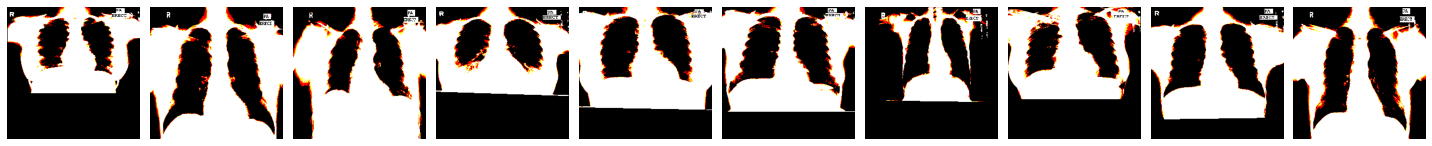

Labels:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
Class indices: {'normal': 0, 'tuberculosis': 1}


In [9]:
batchItem(train_batches)

In [10]:
# creating a sequential model 
model = Sequential([
    # input size should be similar to image size with 3 byte color (RGB)
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(244, 244, 3)), #convulational layer
    MaxPool2D(pool_size=(2,2), strides=2), #max-pooling layer

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=2),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),

    # Flatten the result to feed into DNN
    Flatten(),

    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=2, activation='sigmoid') # sigmoid activation function is used because it is a binary classification
])

In [11]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=1)

Epoch 1/15
10/10 [==============================] - 97s 9s/step - loss: 2.1730 - accuracy: 0.5714 - val_loss: 5.2211 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 44s 5s/step - loss: 1.4062 - accuracy: 0.5918 - val_loss: 1.0621 - val_accuracy: 0.6250
Epoch 3/15
10/10 [==============================] - 58s 6s/step - loss: 0.3534 - accuracy: 0.8469 - val_loss: 0.5207 - val_accuracy: 0.7250
Epoch 4/15
10/10 [==============================] - 38s 4s/step - loss: 0.2067 - accuracy: 0.9082 - val_loss: 0.5255 - val_accuracy: 0.7500
Epoch 5/15
10/10 [==============================] - 54s 5s/step - loss: 0.1100 - accuracy: 0.9694 - val_loss: 0.6413 - val_accuracy: 0.7000
Epoch 6/15
10/10 [==============================] - 53s 5s/step - loss: 0.0622 - accuracy: 1.0000 - val_loss: 0.7618 - val_accuracy: 0.6750
Epoch 7/15
10/10 [==============================] - 39s 4s/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.6477 - val_accuracy: 0.7250
Epoch 8/15
10/10 [==

In [14]:

# this functions plots accuracy vs val_accuracy over the 15 epochs
def plot_acc_vs_val_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracies')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

# this functions plots loss vs val_loss over the 15 epochs
def plot_loss_vs_val_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

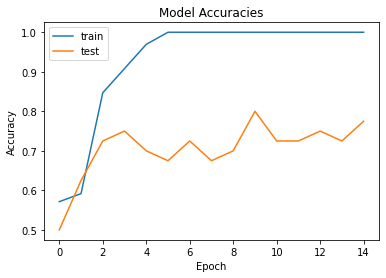

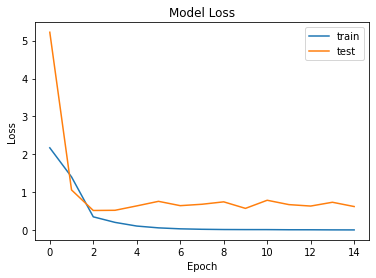

In [15]:
plot_acc_vs_val_acc(history)
plot_loss_vs_val_loss(history)